In [2]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7.5, 7.5]

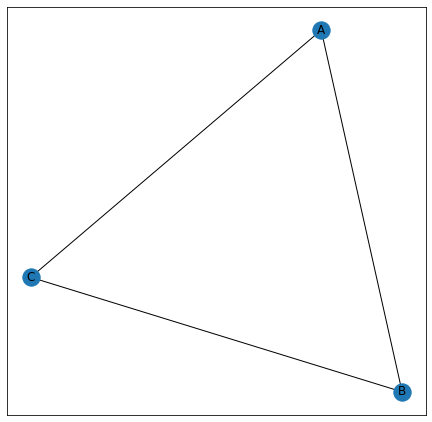

In [2]:
# Graph is undirected network object
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C')])

nx.draw_networkx(G)
plt.show()

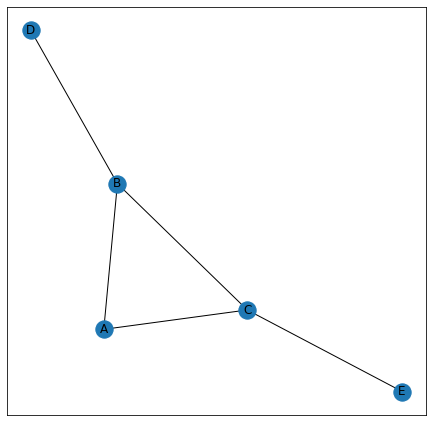

In [3]:
# Nodes can also be added using a nifty shortcut. If you try to add an edge referring to a
# node ID that isn't in the network, NetworkX will automatically add the node.

G.add_edges_from([('B', 'D'), ('C', 'E')])
nx.draw_networkx(G)

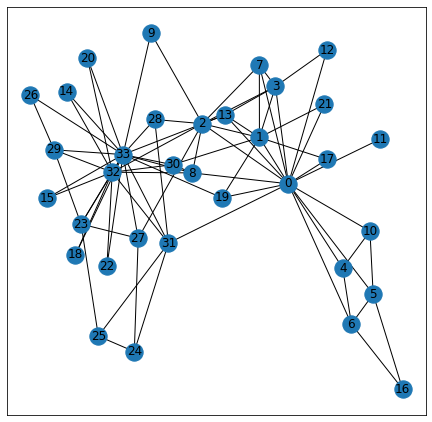

In [4]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [5]:
print(list(G.nodes))
print(list(G.edges))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [6]:
# To check if a node is in the Graph
mr_hi = 0
print(mr_hi in G)
G.has_node(mr_hi)

True


True

In [7]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [8]:
# Neighbors of a node
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [9]:
# Add attributes to the nodes
member_club = [
0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1]

for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]
    
print(G.nodes[mr_hi])
G.nodes[john_a]

{'club': 0}


{'club': 1}

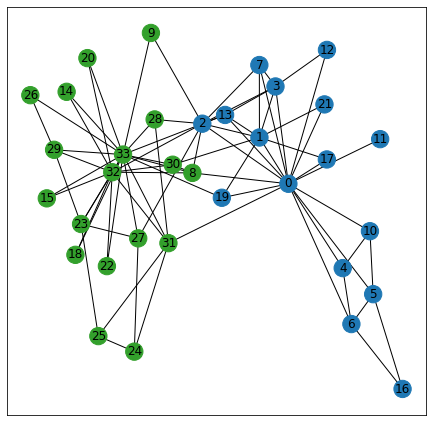

In [10]:
# Change colors of certain nodes
node_color = ['#1f78b4' if G.nodes[v]["club"] == 0 else '#33a02c' for v in G]
nx.draw_networkx(G, karate_pos, label=True, node_color=node_color)

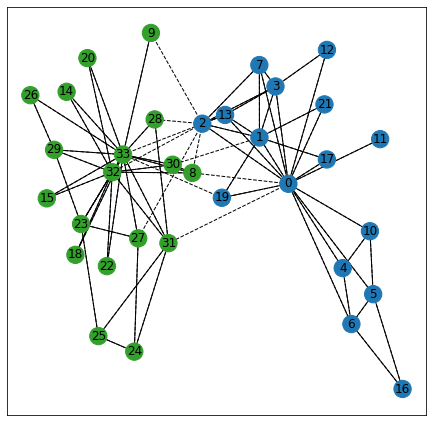

In [11]:
# Attributes can also be set for edges in a network
# Iterate through all edges
for v, w in G.edges:
    # Compare `club` property of edge endpoints
    # Set edge `internal` property to True if they match
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False
        
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if ~G.edges[e]["internal"]]

# Draw nodes and node labels
nx.draw_networkx_nodes(G, karate_pos, node_color=node_color)
nx.draw_networkx_labels(G, karate_pos)

# Draw internal edges as solid lines
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
# Draw external edges as dashed lines using the style parameter
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

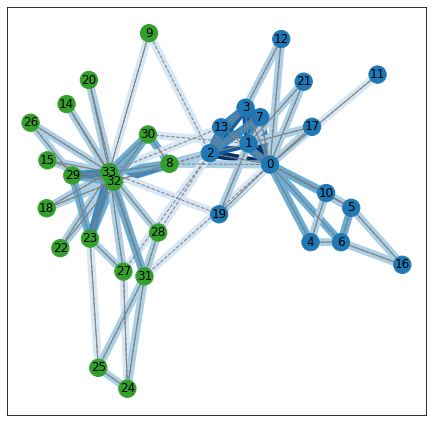

In [12]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

# Why plus one? A weight of zero conventionally means no edge, so without the extra one, edges
# between nodes without common neighbors wouldn't count as edges.Well, if you and a friend don't 
# have any friends in common, there's still one of their friends you're pretty well-acquainted
# with—yourself!

# Calculate weight for each edge
for v, w in G.edges:
    G.edges[v, w]["weight"] = tie_strength(G, v, w)
    
# Store weights in a list
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges]
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")

# Draw network with edge color determined by weight
nx.draw_networkx(G, weighted_pos, width=8, node_color=node_color, edge_color=edge_weights, edge_cmap=plt.cm.Blues,
edge_vmin=0, edge_vmax=6)

# Draw solid/dashed lines on top of internal/external edges
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal, edge_color="gray")
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, edge_color="gray", style="dashed")

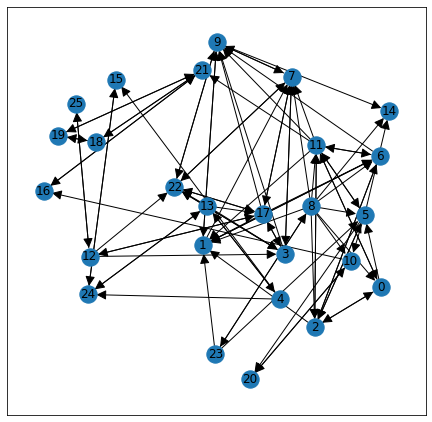

In [18]:
# Directed Graphs

G = nx.read_gexf("data/knecht2008/klas12b-net-1.gexf")
student_pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, student_pos, arrowsize=20)

In [16]:
print(G.nodes)
print(list(G.neighbors('0')))
print(list(G.predecessors('0')))
print(list(G.successors('0')))

['0', '2', '5', '11', '1', '6', '10', '14', '20', '7', '9', '21', '3', '17', '22', '12', '4', '13', '15', '24', '16', '8', '23', '18', '19', '25']
['2', '5', '11']
['2', '11', '8']
['2', '5', '11']


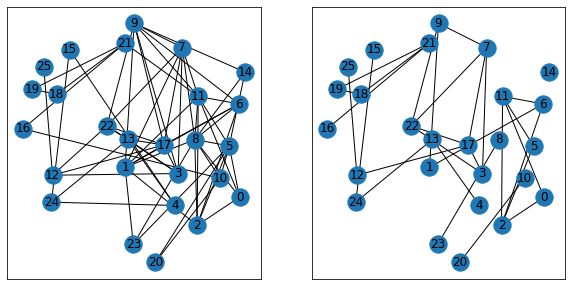

In [19]:
# If the reciprocal parameter is set to True,undirected edges will only 
# be created if directed edges exist in both directions

# Create undirected copies of G
G_either = G.to_undirected()
G_both = G.to_undirected(reciprocal=True)
# Set up a figure
plt.figure(figsize=(10,5))
# Draw G_either on left
plt.subplot(1, 2, 1)
nx.draw_networkx(G_either, student_pos)
# Draw G_both on right
plt.subplot(1, 2, 2)
nx.draw_networkx(G_both, student_pos)

In [20]:
# Use of Multigraph

# The seven bridges of Königsberg
G = nx.MultiGraph()
G.add_edges_from([
    ("North Bank", "Kneiphof", {"bridge": "Krämerbrücke"}),
    ("North Bank", "Kneiphof", {"bridge": "Schmiedebrücke"}),
    ("North Bank", "Lomse", {"bridge": "Holzbrücke"}),
    ("Lomse", "Kneiphof", {"bridge": "Dombrücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Grüne Brücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Köttelbrücke"}),
    ("South Bank", "Lomse", {"bridge": "Hohe Brücke"})
])

[0, 1, 0, 0, 0, 1, 0]

In [21]:
print(list(G.edges)[0])
G.edges['North Bank', 'Kneiphof', 0]

('North Bank', 'Kneiphof', 0)


{'bridge': 'Krämerbrücke'}

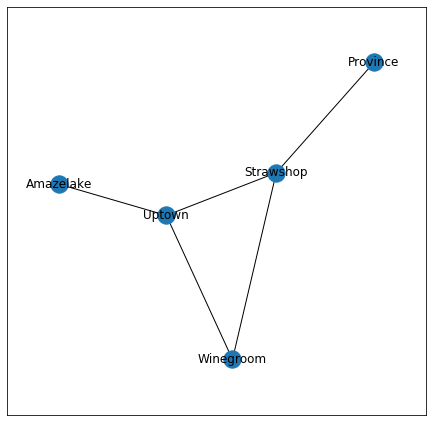

In [23]:
# Reading network from edgelist data
G = nx.read_edgelist('edge_list')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

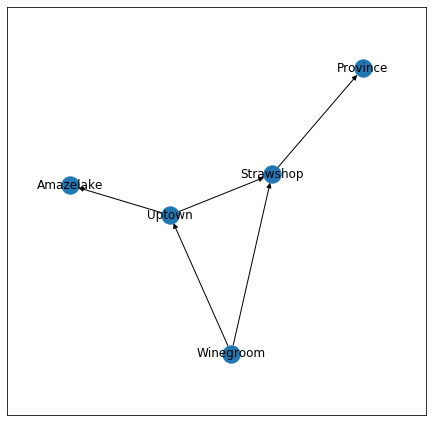

In [25]:
# Draw a directed graph, the only necessary change is that the DiGraph
# class must be passed as the create_using parameter

# Read edge list
G = nx.read_edgelist('edge_list', create_using=nx.DiGraph)
# Draw network
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

In [28]:
# Construct a word pair co-occurence network

# Ignore articles, pronouns, etc.
stop_words = set(['the', 'of', 'and', 'i', 'you', 'that', 'me', 
                  'a', 'in', 'to', 'for', 'from', 'an', 'or', 'by',
                  'your', 'this', 'that', 'it', 'not', 'on', 'is',
                  'he', 'his', 'my', 'was', 'with', 'but', 'has',
                  'have', 'had', 'which', 'when', 'who', 'been', 
                  'at', 'as', 'she', 'her', 'too', 'will', 'be', 'would',
                  'if', 'can', 'could', 'should', 'than', 'they', 'were',
                  'be', 'more', 'their', 'we', 'it', 'if', 'so', 'all',
                  'no', 'are', 'do', 'does', 'did', 'him', 'these', 'what',
                  'them', 'now', 'only', 'even', 'shall', 'am', 'yet', 'one',
                  'both', 'none', 'either', 'neither', 'nor', 'our', 'us',
                  'any', 'other', 'before', 'after', 'those', 'whom', 'such',
                  'say', 'said', 'so', 'may', 'during', 'every', 'own', 'might'])

# This example uses regular expressions from the re package
import re

# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    # Split the text into sentences and iterate through them
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create list of words separated by whitespace
        words = re.split('\s+', clean)
        # Create an edge for each pair of words
        for v in words:
            # Update word count, add node if necessary
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            # Update edge count for each pair of words in this sentence
            for w in words:
                # Skip stop words
                if v == w or v in stop_words or w in stop_words:
                    continue
                # Skip blank space
                if len(v) == 0 or len(w) == 0:
                    continue
                # Add one to the edge's count
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    # Edge doesn't exist, create it
                    G.add_edge(v, w, count=1)
    return G

In [29]:
# Read the text
with open('data/shelley1818/frankenstein.txt') as f:
    text = f.read()
# Create a network from the text
G = co_occurrence_network(text)

pairs = sorted(
    G.edges(data=True),
    key=lambda e: e[2]['count'],
    reverse=True)
pairs[0:10]

[('man', 'old', {'count': 68}),
 ('country', 'native', {'count': 38}),
 ('â', 'âœi', {'count': 34}),
 ('death', 'life', {'count': 32}),
 ('human', 'being', {'count': 32}),
 ('natural', 'philosophy', {'count': 32}),
 ('eyes', 'tears', {'count': 30}),
 ('first', 'eyes', {'count': 28}),
 ('some', 'time', {'count': 26}),
 ('day', 'night', {'count': 26})]

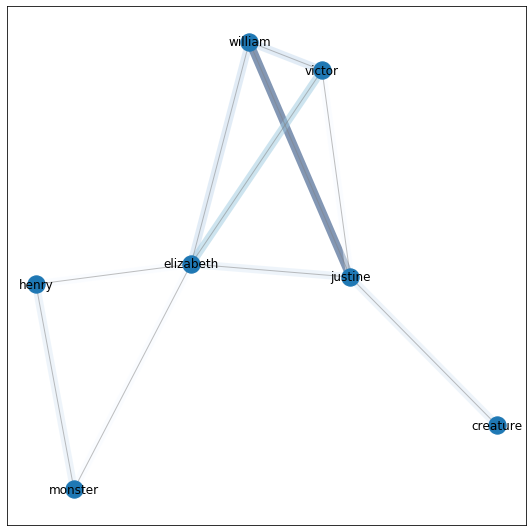

In [31]:
# The subgraph() method of Graph creates a new graph containing a subset of the nodes in
# the original, as well as any edges between those nodes

# Count co-occurrences for characters only
characters = ['creature', 'monster', 'victor', 'elizabeth',
'william', 'henry', 'justine']
G_focus = G.subgraph(characters)
# Create list of edge counts
counts = [G_focus.edges[e]['count'] for e in G_focus.edges]
# Create spring layout
pos = nx.spring_layout(G_focus)
# Create figure and draw nodes
plt.figure()
nx.draw_networkx_nodes(G_focus, pos)
# Draw edges
nx.draw_networkx_edges(G_focus, pos, width=8, edge_color=counts, edge_cmap=plt.cm.Blues, alpha=0.5)
nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)
# Draw labels
nx.draw_networkx_labels(G_focus, pos)
plt.tight_layout()

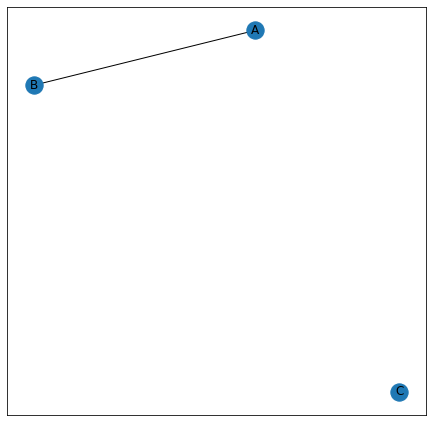

In [7]:
# What happens if we add edges two times for example
# from 1 to 2 and 2 to 1 in a nx.Graph() class?

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C'])
G.add_edges_from([('A', 'B'), ('B', 'A')])
nx.draw_networkx(G)